For what follows, use the coefficient of determination, $r^2$, as one of your metrics of success and report its 95% confidence interval. Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

2. Train a multiple linear regression with and without Lasso regularization to **predict ```gross income```**.

    1. How is the gross income affected by unit price, quantity, and other variables like day, time slot, and product line in general?
    
    4. When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Which features were excluded in this model, if any?

In [1]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, r2_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# data_set is vstack by train and test data
data_set = joblib.load('data_set.pkl')
data_set

,Unit price,Quantity,gross income,Customer type,Gender,Branch_A,Branch_B,Branch_C,Electronic accessories,Fashion accessories,...,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night,Cash,Credit card,Ewallet
29,-1.160308,1.184657,-0.345462,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
535,-1.473301,0.507468,-0.808736,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
695,1.218746,-0.169720,0.573317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
557,1.643305,1.523251,2.940413,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
836,-0.640556,-0.169720,-0.480619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.044450,-0.508315,-0.336353,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
332,0.824649,-0.169720,0.349925,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
208,-0.951645,-0.846909,-0.919159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
613,0.973530,-1.524097,-0.963104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
train = data_set[:800]
test = data_set[800:1000]
print(train.shape, test.shape)

(800, 28) (200, 28)


In [4]:
X_train_1 = train.drop(['gross income'], axis=1).to_numpy()
X_test_1 = test.drop(['gross income'], axis=1).to_numpy()
t_train_1 = train['gross income'].to_numpy()
t_test_1 = test['gross income'].to_numpy()

In [5]:
# load the data I trained in training notebook
Model_1_1 = joblib.load('final_model_1_1.pkl')
Model_1_1
Model_1_2 = joblib.load('final_model_1_2.pkl')
Model_1_2

Pipeline(steps=[('Lasso', Lasso(alpha=0.01, tol=0.01))])

In [6]:
y_train_1_1 = Model_1_1.predict(X_train_1)
y_test_1_1 = Model_1_1.predict(X_test_1)
y_train_1_2 = Model_1_2.predict(X_train_1)
y_test_1_2 = Model_1_2.predict(X_test_1)

In [7]:
print('For train set, r^2 score: ', r2_score(t_train_1, y_train_1_1))
print('\nFor test set, r^2 score: ', r2_score(t_test_1, y_test_1_1))
print('\nFor train set, r^2 score: ', r2_score(t_train_1, y_train_1_2))
print('\nFor test set, r^2 score: ', r2_score(t_test_1, y_test_1_2))

For train set, r^2 score:  0.8885146857742481

For test set, r^2 score:  0.9015539193672009

For train set, r^2 score:  0.8857961111661022

For test set, r^2 score:  0.9033248546567051


[-0.04473193 -0.11570643 -0.10956139 -0.15504497 -0.08156257 -0.11349691
 -0.14649827 -0.25322946 -0.11270718 -0.14988958] 

 [-0.05065074 -0.10601466 -0.08872391 -0.14720844 -0.07570596 -0.09171654
 -0.14321256 -0.20973004 -0.0863156  -0.13546357]


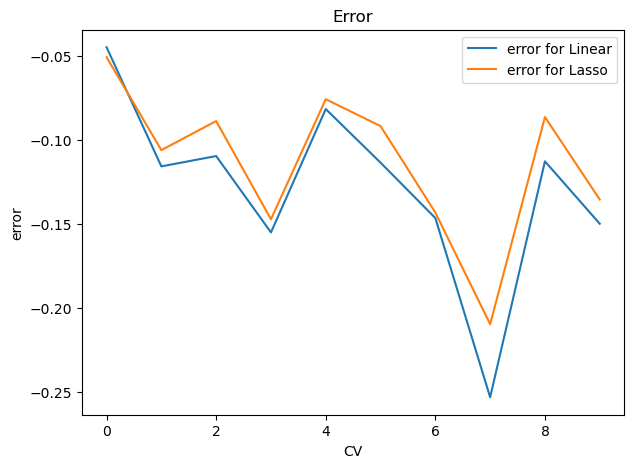

In [8]:
error_scores_1_1 = cross_val_score(Model_1_1,
                           X_test_1,
                           t_test_1,
                           scoring='neg_mean_squared_error',
                          cv=10)
error_scores_1_2 = cross_val_score(Model_1_2,
                           X_test_1,
                           t_test_1,
                           scoring='neg_mean_squared_error',
                          cv=10)
print(error_scores_1_1, '\n\n', error_scores_1_2)
plt.figure(figsize=(7,5))
plt.plot(error_scores_1_1, label='error for Linear')
plt.plot(error_scores_1_2, label='error for Lasso')
plt.xlabel('CV')
plt.ylabel('error')
plt.title('Error')
plt.legend()
plt.show()

In [9]:
scores_1_1 = cross_val_score(Model_1_1,
                           X_test_1,
                           t_test_1,
                           scoring='r2',
                          cv=10)
scores_1_2 = cross_val_score(Model_1_2,
                           X_test_1,
                           t_test_1,
                           scoring='r2',
                          cv=10)
print(scores_1_1, '\n\n', scores_1_2)

[0.93918113 0.8319906  0.84583755 0.90229292 0.91273361 0.8769002
 0.89874924 0.87058515 0.87267768 0.82579156] 

 [0.93113373 0.84606337 0.87515771 0.90723138 0.91899979 0.9005234
 0.90102012 0.89281586 0.90249155 0.84255812]


In [10]:
# report the 95% confidence interval
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, df=len(scores_1_1) - 1,
                 loc=scores_1_1.mean(),
                 scale=scores_1_1.std(ddof=1)/np.sqrt(len(scores_1_1))))
print('95% CI: ', stats.t.interval(confidence, df=len(scores_1_2) - 1,
                 loc=scores_1_2.mean(),
                 scale=scores_1_2.std(ddof=1)/np.sqrt(len(scores_1_2))))

95% CI:  (0.8516283629521609, 0.9037195638610601)
95% CI:  (0.8710183921175831, 0.9125806120617137)


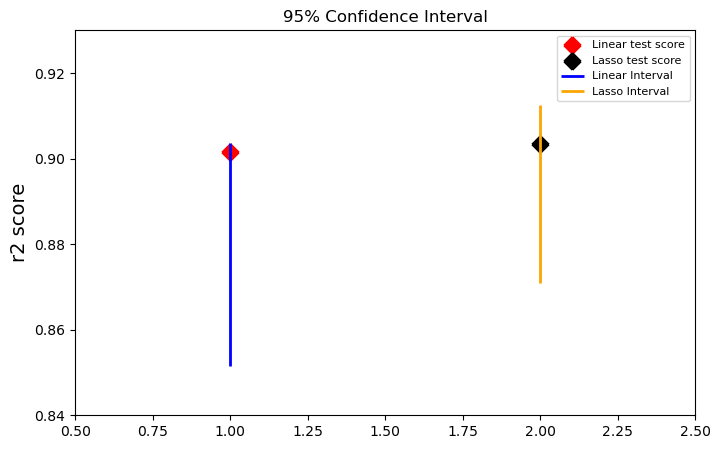

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(1, 0.9015539193672009, c='r', marker='x', linewidth=10, label='Linear test score')
plt.scatter(2, 0.9033248546567051, c='black', marker='x', linewidth=10, label='Lasso test score')
plt.vlines(1, 0.8516283629521609, 0.9037195638610601, 
           linestyles='solid', label='Linear Interval', color='b', linewidth=2)
plt.vlines(2, 0.8710183921175831, 0.9125806120617137, 
           linestyles='solid', label='Lasso Interval', color='orange', linewidth=2)
plt.xlim(0.5, 2.5)
plt.ylim(0.84, 0.93)
plt.legend(fontsize=8)
plt.ylabel('r2 score', fontsize=14);
plt.title('95% Confidence Interval')
plt.show()

#### We can see that r^2 score in test set for both linear algorithms are in the range of 95% confidence interval and are also close to the train set. However, by comparing two models, higher error, high coefficients, larger confidence interval for linear regression implies that lasso demonstrates a greater degree of precision and more unlikely to overfit. As a result, Lasso Regression with alpha=0.01 is the best hyperparameter setting in this problem.

3. Train a multiple linear regression with and without Lasso regularization to **predict ```Unit price```**.

    1. How is the unit price affected by gross income, quantity, and other variables like day, timeslot, and product line in general?
    
    4. When using Lasso regularizer, which value for the hyperparameter $\lambda$ best works for this dataset? Which features were excluded in this model, if any?

In [12]:
X_train_2 = train.drop(['Unit price'], axis=1).to_numpy()
X_test_2 = test.drop(['Unit price'], axis=1).to_numpy()
t_train_2 = train['Unit price'].to_numpy()
t_test_2 = test['Unit price'].to_numpy()

In [13]:
# load the data I trained in training notebook
Model_2_1 = joblib.load('final_model_2_1.pkl')
Model_2_1
Model_2_2 = joblib.load('final_model_2_2.pkl')
Model_2_2

Pipeline(steps=[('Lasso', Lasso(alpha=0.01, tol=0.02))])

In [14]:
y_train_2_1 = Model_2_1.predict(X_train_2)
y_test_2_1 = Model_2_1.predict(X_test_2)
y_train_2_2 = Model_2_2.predict(X_train_2)
y_test_2_2 = Model_2_2.predict(X_test_2)

In [15]:
print('For train set, r^2 score: ', r2_score(t_train_2, y_train_2_1))
print('\nFor test set, r^2 score: ', r2_score(t_test_2, y_test_2_1))
print('\nFor train set, r^2 score: ', r2_score(t_train_2, y_train_2_2))
print('\nFor test set, r^2 score: ', r2_score(t_test_2, y_test_2_2))

For train set, r^2 score:  0.7813065326237771

For test set, r^2 score:  0.7885270894112602

For train set, r^2 score:  0.7751796310956677

For test set, r^2 score:  0.8015911902883164


[-0.09172582 -0.23001661 -0.2585874  -0.20048077 -0.12575044 -0.2195047
 -0.26456098 -0.44098863 -0.19074555 -0.43752905] 

 [-0.09791945 -0.21279584 -0.24882458 -0.18158903 -0.11898633 -0.15726588
 -0.22966125 -0.38908213 -0.15237685 -0.39711125]


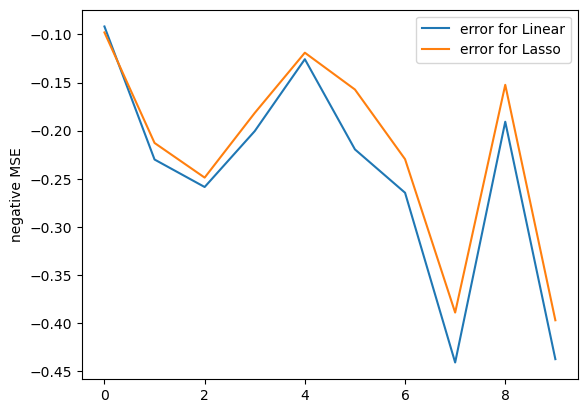

In [16]:
error_scores_2_1 = cross_val_score(Model_2_1,
                           X_test_2,
                           t_test_2,
                           scoring='neg_mean_squared_error',
                          cv=10)
error_scores_2_2 = cross_val_score(Model_2_2,
                           X_test_2,
                           t_test_2,
                           scoring='neg_mean_squared_error',
                          cv=10)
print(error_scores_2_1, '\n\n', error_scores_2_2)
plt.plot(error_scores_2_1, label='error for Linear')
plt.plot(error_scores_2_2, label='error for Lasso')
plt.ylabel('negative MSE')
plt.legend()
plt.show()

In [17]:
scores_2_1 = cross_val_score(Model_2_1,
                           X_test_2,
                           t_test_2,
                           scoring='r2',
                          cv=10)
scores_2_2 = cross_val_score(Model_2_2,
                           X_test_2,
                           t_test_2,
                           scoring='r2',
                          cv=10)
print(scores_2_1, '\n\n', scores_2_2)

[0.86477641 0.69221615 0.77865899 0.84139207 0.8938039  0.78432309
 0.7980487  0.72132611 0.76865123 0.41404327] 

 [0.85564568 0.71525917 0.7870156  0.85633805 0.89951618 0.84547657
 0.82468923 0.75412738 0.81518732 0.46817244]


In [18]:
# report the 95% confidence interval
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, df=len(scores_2_1) - 1,
                 loc=scores_2_1.mean(),
                 scale=scores_2_1.std(ddof=1)/np.sqrt(len(scores_2_1))))
print('95% CI: ', stats.t.interval(confidence, df=len(scores_2_2) - 1,
                 loc=scores_2_2.mean(),
                 scale=scores_2_2.std(ddof=1)/np.sqrt(len(scores_2_2))))

95% CI:  (0.6592871776646715, 0.8521608091517784)
95% CI:  (0.6943816749634448, 0.8699038478690548)


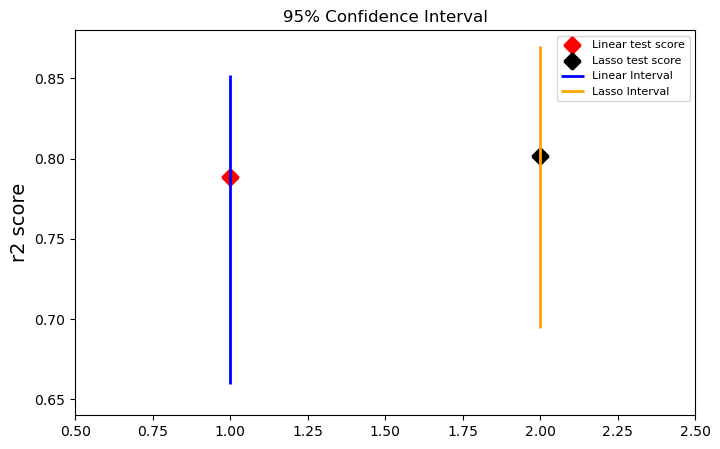

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(1, 0.7885270894112602, c='r', marker='x', linewidth=10, label='Linear test score')
plt.scatter(2, 0.8015911902883164, c='black', marker='x', linewidth=10, label='Lasso test score')
plt.vlines(1, 0.6592871776646715, 0.8521608091517784, 
           linestyles='solid', label='Linear Interval', color='b', linewidth=2)
plt.vlines(2, 0.6943816749634448, 0.8699038478690548, 
           linestyles='solid', label='Lasso Interval', color='orange', linewidth=2)
plt.xlim(0.5, 2.5)
plt.ylim(0.64, 0.88)
plt.legend(fontsize=8)
plt.colormaps()
plt.ylabel('r2 score', fontsize=14);
plt.title('95% Confidence Interval')
plt.show()

#### We can see that r^2 score in test set is in the range of 95% confidence interval and is also close to the train set. However, by comparing two models, higher error, larger confidence interval for linear regression implies that lasso demonstrates a greater degree of precision and be more sutible to this problem. As a result, Lasso Regression with alpha=0.01 is the best hyperparameter setting in this problem.

4. Train a logistic regression to **classify gender** and study the relationship between attributes. Namely, explain the relationship between gender, product line, payment and gross income for branch C. To study this relationship, consider all the interaction attribution of degree 2. (See ```interaction_only``` variable in [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)).

    1. For ```Gender=male``` customers, plot the parameters values for all attributes (and its 2nd-order interactions).
    2. Which attributes are the most informative?

In [20]:
# import data from file
data_3 = joblib.load('data_3.pkl')
train_3 = data_3[:264]
test_3 = data_3[264:328]
X_train_3 = train_3[:,:67]
X_test_3 = test_3[:,:67]
t_train_3 = train_3[:,67]
t_test_3 = test_3[:,67]
print(X_train_3.shape, X_test_3.shape)
print(t_train_3.shape, t_test_3.shape)

(264, 67) (64, 67)
(264,) (64,)


In [21]:
# load the data I trained in training notebook
Model_3 = joblib.load('final_Model_3.pkl')
Model_3

Pipeline(steps=[('Log_reg',
                 LogisticRegression(max_iter=1000, penalty='none',
                                    random_state=1, solver='newton-cg'))])

In [22]:
y_train_3 = Model_3.predict(X_train_3)
y_test_3 = Model_3.predict(X_test_3)

In [23]:
print('For train set, accuracy score: ', accuracy_score(t_train_3, y_train_3))
print('\nFor test set, accuracy score: ', accuracy_score(t_test_3, y_test_3))

For train set, accuracy score:  0.6439393939393939

For test set, accuracy score:  0.5625


In [24]:
scores_3 = cross_val_score(Model_3,
                           X_test_3,
                           t_test_3,
                           scoring='accuracy',
                          cv=10)
scores_3

array([0.28571429, 0.42857143, 0.57142857, 0.28571429, 0.33333333,
       0.66666667, 0.33333333, 0.5       , 0.16666667, 0.33333333])

In [25]:
# report the 95% confidence interval
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, df=len(scores_3) - 1,
                 loc=scores_3.mean(),
                 scale=scores_3.std(ddof=1)/np.sqrt(len(scores_3))))

95% CI:  (0.28269459200877267, 0.49825778894360817)


C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


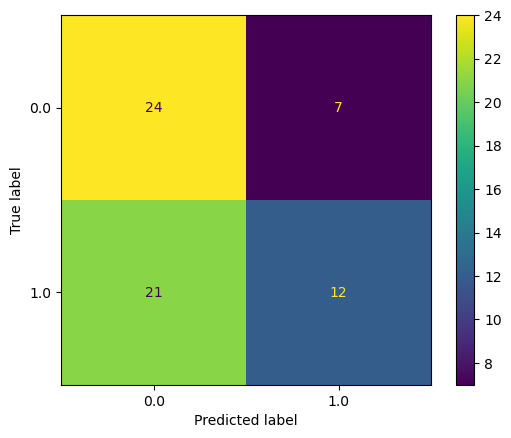

              precision    recall  f1-score   support

         0.0       0.53      0.77      0.63        31
         1.0       0.63      0.36      0.46        33

    accuracy                           0.56        64
   macro avg       0.58      0.57      0.55        64
weighted avg       0.58      0.56      0.54        64



In [26]:
plot_confusion_matrix(Model_3, X_test_3, t_test_3)
plt.show()
print(classification_report(t_test_3, y_test_3))

#### There are  huge difference between train and test accuracy score, which implies the algorithm is overfitting. Also, the big confidence interval demonstrates that the model does not provide a precise representation of the population mean.

5. Train a logistic regression to **classify customer type** and study the relationship between attributes. Namely, explain the relationship between customer type, gender, day and timeslot for branch C. To study this relationship, consider all the interaction attribution of degree 2. (See ```interaction_only``` variable in [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)).

    1. For ```Customer type = Normal``` customers, plot the parameters values for all attributes (and its 2nd-order interactions).
    2. Which attributes are the most informative?

In [27]:
data_4 = joblib.load('data_4.pkl')
train_4 = data_4[:264]
test_4 = data_4[264:328]
X_train_4 = train_4[:,:92]
X_test_4 = test_4[:,:92]
t_train_4 = train_4[:,92]
t_test_4 = test_4[:,92]
print(X_train_4.shape, X_test_4.shape)
print(t_train_4.shape, t_test_4.shape)

(264, 92) (64, 92)
(264,) (64,)


In [28]:
# load the data I trained in training notebook
Model_4 = joblib.load('final_Model_4.pkl')
Model_4

Pipeline(steps=[('Log_reg',
                 LogisticRegression(max_iter=2000, penalty='none',
                                    random_state=1, solver='newton-cg'))])

In [29]:
y_train_4 = Model_4.predict(X_train_4)
y_test_4 = Model_4.predict(X_test_4)

In [30]:
print('For train set, accuracy score: ', accuracy_score(t_train_4, y_train_4))
print('\nFor test set, accuracy score: ', accuracy_score(t_test_4, y_test_4))

For train set, accuracy score:  0.6628787878787878

For test set, accuracy score:  0.484375


In [31]:
scores_4 = cross_val_score(Model_4,
                           X_test_4,
                           t_test_4,
                           scoring='accuracy',
                          cv=10)
scores_4

array([0.14285714, 0.42857143, 0.28571429, 0.28571429, 0.33333333,
       0.66666667, 0.33333333, 0.33333333, 0.83333333, 0.83333333])

In [32]:
# report the 95% confidence interval
confidence = 0.95

print('95% CI: ', stats.t.interval(confidence, df=len(scores_4) - 1,
                 loc=scores_4.mean(),
                 scale=scores_4.std(ddof=1)/np.sqrt(len(scores_4))))

95% CI:  (0.2739600317325452, 0.6212780635055501)


C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


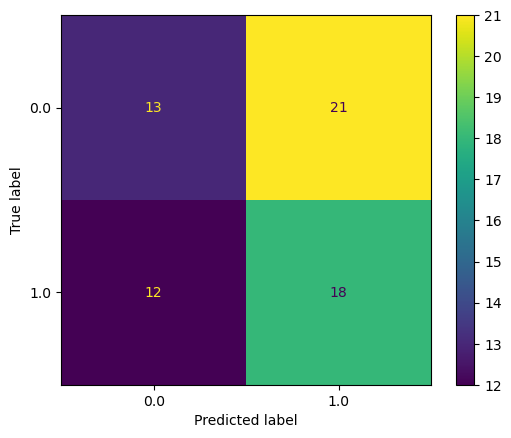

              precision    recall  f1-score   support

         0.0       0.52      0.38      0.44        34
         1.0       0.46      0.60      0.52        30

    accuracy                           0.48        64
   macro avg       0.49      0.49      0.48        64
weighted avg       0.49      0.48      0.48        64



In [33]:
plot_confusion_matrix(Model_4, X_test_4, t_test_4)
plt.show()
print(classification_report(t_test_4, y_test_4))

#### There are  huge difference between train and test accuracy score, which implies the algorithm is overfitting. Also, the big confidence interval demonstrates that the model does not provide a precise representation of the population mean.

For what follows, use accuracy as one of your metrics of success and report its 95% confidence interval. Carry any necessary hyperparameter tuning with pipelines. Choose the best CV strategy and report on the best hyperparameter settings.

6. Train a classifier to **predict the day of purchase** (Monday, Tuesday, etc.).

    1. Select at least 2 classifiers.

In [34]:
# data_day is vstack by train and test data
data_day = joblib.load('data_day.pkl')
data_day

,Unit price,Quantity,gross income,Customer type,Gender,Branch_A,Branch_B,Branch_C,Electronic accessories,Fashion accessories,...,Home and lifestyle,Sports and travel,Afternoon,Evening,Morning,Night,Cash,Credit card,Ewallet,Date
29,-1.160308,1.184657,-0.345462,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,-1.473301,0.507468,-0.808736,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
695,1.218746,-0.169720,0.573317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
557,1.643305,1.523251,2.940413,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0
836,-0.640556,-0.169720,-0.480619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.044450,-0.508315,-0.336353,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
332,0.824649,-0.169720,0.349925,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
208,-0.951645,-0.846909,-0.919159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
613,0.973530,-1.524097,-0.963104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [35]:
train5 = data_day[:800]
test5 = data_day[800:1000]
print(train5.shape, test5.shape)

(800, 22) (200, 22)


In [36]:
X_train_5 = train5.drop(['Date'], axis=1)
X_test_5 = test5.drop(['Date'], axis=1)
t_train_5 = train5['Date']
t_test_5 = test5['Date']

In [37]:
# load the data I trained in training notebook, encluding three calssifiers
Model_5_1 = joblib.load('final_model_5_1.pkl')
Model_5_2 = joblib.load('final_model_5_2.pkl')
Model_5_3 = joblib.load('final_model_5_3.pkl')
print(Model_5_1, '\n', Model_5_2, '\n', Model_5_3)

Pipeline(steps=[('Log_reg',
                 LogisticRegression(max_iter=1000, solver='newton-cg'))]) 
 Pipeline(steps=[('DT', DecisionTreeClassifier(max_depth=1))]) 
 Pipeline(steps=[('Random_Forest',
                 RandomForestClassifier(max_depth=5, min_samples_split=4,
                                        n_estimators=150))])


In [38]:
# classifier 1
y_train_5_1 = Model_5_1.predict(X_train_5)
y_test_5_1 = Model_5_1.predict(X_test_5)
# classifier 2
y_train_5_2 = Model_5_2.predict(X_train_5)
y_test_5_2 = Model_5_2.predict(X_test_5)
# classifier 3
y_train_5_3 = Model_5_3.predict(X_train_5)
y_test_5_3 = Model_5_3.predict(X_test_5)

In [39]:
print('Classifier 1', Model_5_1, '\n')
print('For train set, accuracy score: ', accuracy_score(t_train_5, y_train_5_1))
print('\nFor test set, accuracy score: ', accuracy_score(t_test_5, y_test_5_1))
print('------------------------------------------------------------------------------')
print('Classifier 2', Model_5_2, '\n')
print('For train set, accuracy score: ', accuracy_score(t_train_5, y_train_5_2))
print('\nFor test set, accuracy score: ', accuracy_score(t_test_5, y_test_5_2))
print('------------------------------------------------------------------------------')
print('Classifier 3', Model_5_3, '\n')
print('For train set, accuracy score: ', accuracy_score(t_train_5, y_train_5_3))
print('\nFor test set, accuracy score: ', accuracy_score(t_test_5, y_test_5_3))

Classifier 1 Pipeline(steps=[('Log_reg',
                 LogisticRegression(max_iter=1000, solver='newton-cg'))]) 

For train set, accuracy score:  0.23375

For test set, accuracy score:  0.135
------------------------------------------------------------------------------
Classifier 2 Pipeline(steps=[('DT', DecisionTreeClassifier(max_depth=1))]) 

For train set, accuracy score:  0.18125

For test set, accuracy score:  0.13
------------------------------------------------------------------------------
Classifier 3 Pipeline(steps=[('Random_Forest',
                 RandomForestClassifier(max_depth=5, min_samples_split=4,
                                        n_estimators=150))]) 

For train set, accuracy score:  0.5775

For test set, accuracy score:  0.155


In [40]:
scores_5_1 = cross_val_score(Model_5_1,
                           X_test_5,
                           t_test_5,
                           scoring='accuracy',
                          cv=10)
scores_5_2 = cross_val_score(Model_5_2,
                           X_test_5,
                           t_test_5,
                           scoring='accuracy',
                          cv=10)
scores_5_3 = cross_val_score(Model_5_3,
                           X_test_5,
                           t_test_5,
                           scoring='accuracy',
                          cv=10)
print(scores_5_1, '\n', scores_5_2, '\n', scores_5_3)

[0.15 0.15 0.1  0.15 0.1  0.2  0.1  0.05 0.15 0.25] 
 [0.1  0.15 0.2  0.2  0.15 0.15 0.1  0.2  0.15 0.15] 
 [0.05 0.1  0.   0.25 0.   0.1  0.   0.05 0.2  0.1 ]


In [41]:
# report the 95% confidence interval
confidence = 0.95

print('95% CI for Classifier1: ', stats.t.interval(confidence, df=len(scores_5_1) - 1,
                 loc=scores_5_1.mean(),
                 scale=scores_5_1.std(ddof=1)/np.sqrt(len(scores_5_1))))
print('95% CI for Classifier2: ', stats.t.interval(confidence, df=len(scores_5_2) - 1,
                 loc=scores_5_2.mean(),
                 scale=scores_5_2.std(ddof=1)/np.sqrt(len(scores_5_2))))
print('95% CI for Classifier3: ', stats.t.interval(confidence, df=len(scores_5_3) - 1,
                 loc=scores_5_3.mean(),
                 scale=scores_5_3.std(ddof=1)/np.sqrt(len(scores_5_3))))

95% CI for Classifier1:  (0.09939303619666656, 0.1806069638033334)
95% CI for Classifier2:  (0.12860816643468842, 0.18139183356531152)
95% CI for Classifier3:  (0.024089554294999843, 0.14591044570500014)


C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


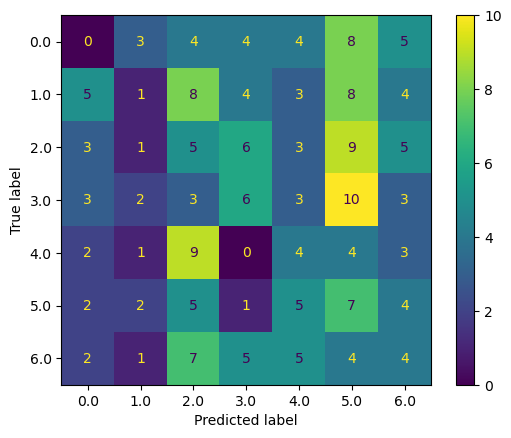

C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


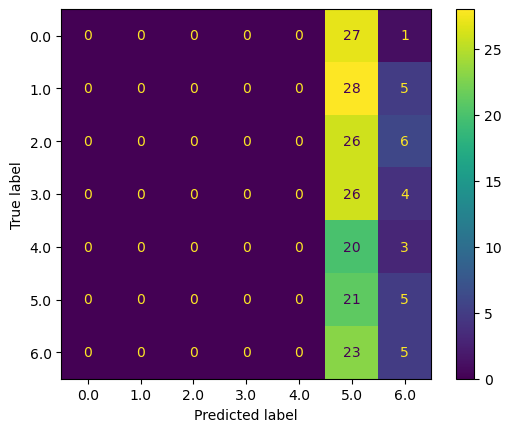

C:\anaconda new\anaconda\envs\gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


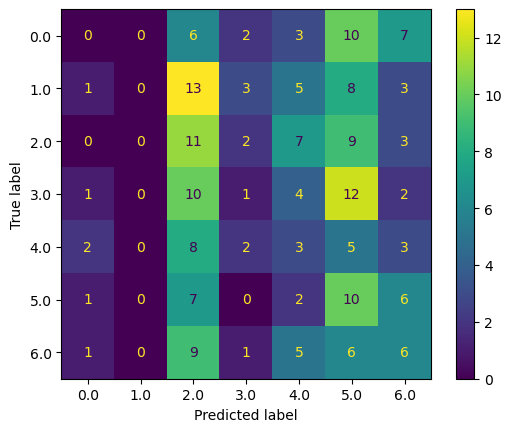

In [42]:
plot_confusion_matrix(Model_5_1, X_test_5, t_test_5)
plt.show()
plot_confusion_matrix(Model_5_2, X_test_5, t_test_5)
plt.show()
plot_confusion_matrix(Model_5_3, X_test_5, t_test_5)
plt.show()

#### By comparing the train and test accuracy score, we can conclude that all algorithms are all overfitting. Although there are closer accuracy score in decision tree algorithm, the result of confusion matrix implies that decision tree can not correctly classify several targets. For random forest classifier, test accuracy does not lie in 95% confidence interval, which is not suitable for this classification. As a result, the best algorithm for this problem is logistic regression with solver='newton-cg'.